# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement

Electric vehicles sales are souring in recent years to reduce pollution, people are becoming cautious about impact they make in global warming. 

Here my question is how well EV sales in the state Washington compared to USA EV sales.I have Washington EV registration data programmatically dowloaded from data.gov and Global EV sales got from IEA website. These two are reliable sources,hence the data.


#### **Dataset 1: Electric Vehicle Population of Washington state**

This shows the number of vehicles that were registered by Washington State Department of Licensing (DOL) each month. The data is separated by county for passenger vehicles and trucks. 

Type: CSV File

Method: The data was gathered using programmatically downloading method from DATA.GOV

Dataset variables:

*   *Variable 1 'Electric Vehicle Type' - Battery Electric Vehicle (BEV) or Plug-in Hybrid Electric Vehicle (PHEV)
*   *Variable 2 'Model Year' 

In [206]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

#### Programmaticaly downloading file

In [207]:
# Gathering data
# Got url from data.gov
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
#Create an HTTP GET request for file download from data.gov
r = requests.get(url)
#Raise an exception if we made a request resulting in an error
r.raise_for_status()
# Defining file name
file_path= 'Electric_Vehicle_Population_Data1.csv'
#Writing in binary mode
with open(file_path, mode = 'wb') as file:
        file.write(r.content)


In [208]:
# loading data
df_raw = pd.read_csv('Electric_Vehicle_Population_Data1.csv')
df_raw.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10


#### Dataset 2: EV Sales data for all countries

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Global EV Data Explorer

Dataset variables:

*   *Variable 1 'Year'
*   *Variable 2 'Value'(No. of EV vehicles sold)

#### Manually downloading file from IEA website

Manually downloaded data from the following link 

https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [209]:
#loading data 
df_raw2 = pd.read_csv('IEA-EV-dataEV salesHistoricalCars.csv')
df_raw2.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


## 2. Assess data


### Quality Issue 1: Missing data

In [210]:
# Inspecting the dataframe visually
df_raw.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [211]:
# Checking for missing values
df_raw.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 376
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [212]:
# Finding columns which have missing values
null_col = []
for i in df_raw.columns:
    if df_raw[i].isnull().sum()>0:
        null_col.append(i)
null_col

['County',
 'City',
 'Postal Code',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

Issue and justification: There are missing values in the following columns ['County', 'City', 'Postal Code', 'Electric Range', 'Base MSRP',
 'Legislative District', 'Vehicle Location', 'Electric Utility',
 '2020 Census Tract']

### Quality Issue 2: Incomplete column 

In [213]:
df_raw[df_raw['Base MSRP'] == 0.0]
# More than 90% of Base MSRP column has zero values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173528,5YJ3E1EA0P,King,Redmond,WA,98052.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,227238091,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
173529,5YJXCBE22H,Snohomish,Snohomish,WA,98296.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,1.0,113289473,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
173530,1C4RJXR65R,King,Kent,WA,98031.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,257440403,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
173531,5UXKT0C50G,King,Seattle,WA,98199.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,36.0,114351471,POINT (-122.394185 47.639195),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [214]:
df_raw.shape

(173533, 17)

In [215]:
# Calculating % of null values in a column
170155/173533

0.9805339618401111

In [216]:
#FILL IN - Inspecting the dataframe programmatically
df_raw.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,173528.000000,173533.000000,173532.000000,173532.000000,173157.000000,1.735330e+05,1.735280e+05
mean,98174.746099,2020.435352,60.148002,1113.254472,29.146670,2.188134e+08,5.297739e+10
std,2411.109685,2.994442,92.644038,8513.543524,14.871778,7.658800e+07,1.567028e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.801662e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.271021e+08,5.303303e+10
75%,98370.000000,2023.000000,83.000000,0.000000,42.000000,2.530049e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


Issue and justification: 
Base MSRP column has lot of zero values, 98% of that column has no MSRP values, There is no point in keeping that column for our analysis. 
Due to incompleteness we can drop that column

### Tidiness Issue 1: Data format issue

In [217]:
#FILL IN - Inspecting the dataframe visually
df_raw.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10


In [218]:
#FILL IN - Inspecting the dataframe programmatically
df_raw.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

Issue and justification: 
 - Postal code is in float datatype, we have convert that to string type with standard 5 digits to avoid losing of zero in front of text.
 - Model year, Base MSRP, DOL Vehicle ID datatypes need to be changed

### Tidiness Issue 2:  Data structure issue - diffrent units of value in a column

In [219]:
df_raw2.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [220]:
df_raw2.unit.unique()

array(['Vehicles', 'percent', 'Milion barrels per day',
       'Oil displacement, million lge', 'GWh'], dtype=object)

Justification: 
 In value column it has mix of count of vehicles, percentage,Milion barrels per day,Oil displacement, million lge and GWh. Unit of value is different which violates data structure rule.

### Tidiness Issue 3: 

In [221]:
#FILL IN - Inspecting the dataframe visually
df_raw.sample(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
28720,YV4BR0CK4M,King,Shoreline,WA,98133.0,2021,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18.0,0.0,32.0,152697296,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
47486,KM8KNDAF2P,Spokane,Cheney,WA,99004.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,6.0,258176733,POINT (-117.57579 47.492775),CITY OF CHENEY - (WA),5.306301e+10
148764,WA1L2BFZ3P,King,Bellevue,WA,98005.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,254900936,POINT (-122.16085 47.624515),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [222]:
#FILL IN - Inspecting the dataframe programmatically
df_raw['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            135617
Plug-in Hybrid Electric Vehicle (PHEV)     37916
Name: Electric Vehicle Type, dtype: int64

In [223]:
df_raw['Electric Vehicle Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 173533 entries, 0 to 173532
Series name: Electric Vehicle Type
Non-Null Count   Dtype 
--------------   ----- 
173533 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


Issue and justification: 
 - Electric Vehicle Type column has only two values, which can be converted to categorical datatype and instead of keeping lengthy we can just keep abbreviation to match with other dataset column.

## 3. Clean data

In [224]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_rawwa = df_raw.copy()
df_rawwa.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [225]:
# Checking for duplicates
df_rawwa.duplicated().sum()

0

In [226]:
df_rawwa[df_raw['Base MSRP'] > 800000.0]
# I thought it might be error, but it looks like it belongs to collector car market.

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
171539,WP0CA2A13F,King,Hunts Point,WA,98004.0,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12.0,845000.0,48.0,100479039,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


### **Quality Issue 1:  Missing values

In [227]:
# Checking for missing values
df_rawwa.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 376
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [228]:
# remove the NAN values using dropna method
df_rawwa.dropna(inplace=True)

In [229]:
# FILL IN - Validate the cleaning was successful
df_rawwa.isnull().sum().sum()

0

Justification: There were some missing values in dataset, those were removed using dropna method

### **Quality Issue 2: Removing incomplete column 

In [230]:
# Removing column which ha lot of null values
df_rawwa.drop(columns = 'Base MSRP',axis=1,inplace=True)

In [231]:
# Checking whether column has been removed in dataset
df_rawwa.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

Justification: 
Base MSRP column has lot of zero values, 98% of that column has no MSRP values, There is no point in keeping that column for our analysis. 
Due to incompleteness we can drop that column.

### **Tidiness Issue 1: Changing datatypes

In [232]:
#FILL IN - Apply the cleaning strategy
df_rawwa.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object

In [233]:
# Converting from float to string and removing trailing '.0'
df_rawwa['Postal Code']= df_rawwa['Postal Code'].astype(str).str[:-2]

In [234]:
# Changing year dtype from int datetime format
df_rawwa['Model Year'] = pd.to_datetime(df_rawwa['Model Year'],format='%Y')

In [235]:
#Validate the cleaning was successful
df_rawwa.dtypes

VIN (1-10)                                                   object
County                                                       object
City                                                         object
State                                                        object
Postal Code                                                  object
Model Year                                           datetime64[ns]
Make                                                         object
Model                                                        object
Electric Vehicle Type                                        object
Clean Alternative Fuel Vehicle (CAFV) Eligibility            object
Electric Range                                              float64
Legislative District                                        float64
DOL Vehicle ID                                                int64
Vehicle Location                                             object
Electric Utility                                

Justification: 
- Postal code is in float datatype, we have converted that to string type with standard 5 digits to avoid losing of zero in front of text.
 - Model year datatype changed from int to datetime year
 (I am not treating Base MSRP, DOL Vehicle ID column, as they are irrelevant for our analysis)

### **Tidiness Issue 2:  Data structure issue - Different units of value in a column

In [236]:
df_raw2.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00280
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


For our problem question we are going to use only count of vehicle value, so can ignore this issue. We can drop rest of units, just use vehicle value.

  However just to show how to clean this mess, doing the clean up in below cells

In [237]:
# for our analysis we are using EV sales parameter, 
# but for showing the clean up keeping EV sales share parameter too, 
# can drop rest of parameter

# Getting values in parameter col
df_raw2.parameter.unique()
# making list of parameter value to be removed
params = ['EV stock', 'EV stock share','Oil displacement Mbd', 
          'Oil displacement, million lge', 'Electricity demand']
# Removing unnecessary rows
for i in params:
    df_raw2 = df_raw2.drop(df_raw2[df_raw2.parameter == i].index)


In [238]:
# Checking parameter column
df_raw2.parameter.unique()

array(['EV sales share', 'EV sales'], dtype=object)

In [239]:
# Inspecting df after removal of rows
df_raw2.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.0065
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0000
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.0300
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0000


In [240]:
df_raw2.shape

(1278, 8)

In [241]:
df_raw2.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [242]:
# Value and percent in separate columns
df_clean = df_raw2.pivot(index=['region','powertrain', 'year'],
              columns=['parameter'],values='value').reset_index()

In [243]:
# Checking after cleaning
df_clean.head()

parameter,region,powertrain,year,EV sales,EV sales share
0,Australia,BEV,2011,49.0,NaN
1,Australia,BEV,2012,170.0,NaN
2,Australia,BEV,2013,190.0,NaN
3,Australia,BEV,2014,370.0,NaN
4,Australia,BEV,2015,760.0,NaN


In [244]:
df_clean['EV sales share'].describe()

count    444.000000
mean       4.973455
std       11.708099
min        0.000160
25%        0.079000
50%        0.600000
75%        3.200000
max       88.000000
Name: EV sales share, dtype: float64

Justification: 
In value column it has mix of count of vehicles, percentage,Milion barrels per day,Oil displacement, million lge and GWh. Unit of value is different which violates data structure rule.

Now we cleaned this data with value and percent in separate column


### **Tidiness Issue 3:

In [245]:
# Checking values in Electric Vehicle Type column
df_rawwa['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            135364
Plug-in Hybrid Electric Vehicle (PHEV)     37787
Name: Electric Vehicle Type, dtype: int64

In [246]:
# Changing value to keep abbreviation
bevindex = df_rawwa[df_rawwa['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)'].index
df_rawwa.loc[bevindex,'Electric Vehicle Type']= 'BEV'
#bevindex.values

In [247]:
# Changing value to keep abbreviation
phevindex = df_rawwa[df_rawwa['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)'].index
df_rawwa.loc[phevindex,'Electric Vehicle Type']= 'PHEV'

In [248]:
# Validate the cleaning was successful
df_rawwa['Electric Vehicle Type'].value_counts()

BEV     135364
PHEV     37787
Name: Electric Vehicle Type, dtype: int64

Justification: 
- Electric Vehicle Type column has only two values, which can be converted to categorical datatype and instead of keeping lengthy we can just keep abbreviation to match with other dataset column.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [249]:
# Removing unnecessary variables from washington EV dataset, creating new subset
df_wa = df_rawwa[['Model Year','Make','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']]
df_wa.head()

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,2016-01-01,BMW,PHEV,Not eligible due to low battery range,14.0
1,2018-01-01,TESLA,BEV,Clean Alternative Fuel Vehicle Eligible,215.0
2,2014-01-01,CHEVROLET,PHEV,Clean Alternative Fuel Vehicle Eligible,38.0
3,2021-01-01,CHRYSLER,PHEV,Clean Alternative Fuel Vehicle Eligible,32.0
4,2018-01-01,TESLA,BEV,Clean Alternative Fuel Vehicle Eligible,215.0


In [250]:
# Creating better column names to use dot notation
# Let's assume Model year of the vehicle as purchase/sold year
df_wa.columns = ['Year','Make','EV_type','CAFV_eligibility','Electric_Range']

In [251]:
# Checking shape of dataset
df_wa.shape

(173151, 5)

In [252]:
# To make it uniform with IEA data changing back year datatype
df_wa['Year'] = df_wa['Year'].dt.year

/tmp/ipykernel_13/3456404065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa['Year'] = df_wa['Year'].dt.year


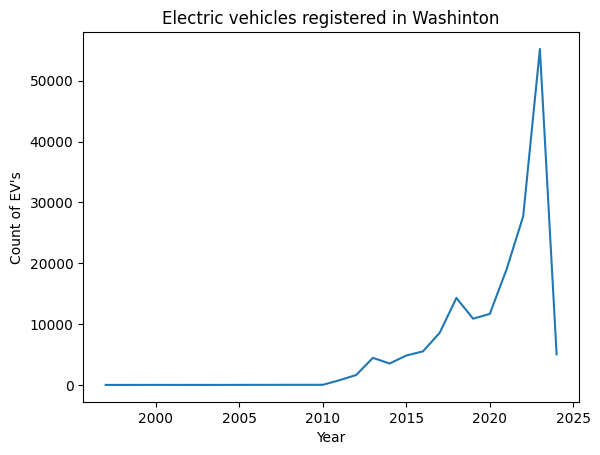

In [253]:
#Getting count of vehicles registered each year
df_wa.groupby(['Year'])['Make'].count().plot(
    xlabel='Year',
    ylabel="Count of EV's",
    title = 'Electric vehicles registered in Washinton');

This data is collected in 2023, model year 2024 shows they are released in earlier years. So we can leave 2024 model year data to avoid misleading information

In [254]:
# Getting index of 2024 data
index_2024 = df_wa[df_wa['Year']==2024].index

In [255]:
# Deleting 2024 data
df_wa = df_wa.drop(index_2024)

In [256]:
# Resetting index od dataset
df_wa.reset_index(drop=True)

,Year,Make,EV_type,CAFV_eligibility,Electric_Range
0,2016,BMW,PHEV,Not eligible due to low battery range,14.0
1,2018,TESLA,BEV,Clean Alternative Fuel Vehicle Eligible,215.0
2,2014,CHEVROLET,PHEV,Clean Alternative Fuel Vehicle Eligible,38.0
3,2021,CHRYSLER,PHEV,Clean Alternative Fuel Vehicle Eligible,32.0
4,2018,TESLA,BEV,Clean Alternative Fuel Vehicle Eligible,215.0
...,...,...,...,...,...
168118,2022,CHEVROLET,BEV,Eligibility unknown as battery range has not b...,0.0
168119,2023,TESLA,BEV,Eligibility unknown as battery range has not b...,0.0
168120,2017,TESLA,BEV,Clean Alternative Fuel Vehicle Eligible,200.0
168121,2016,BMW,PHEV,Not eligible due to low battery range,14.0


In [257]:
# To check 2024 data is removed
df_wa.shape

(168123, 5)

In [258]:
df_wa.CAFV_eligibility.value_counts()
# For plotting purpose we can change values to keep it simple

Eligibility unknown as battery range has not been researched    86176
Clean Alternative Fuel Vehicle Eligible                         63929
Not eligible due to low battery range                           18018
Name: CAFV_eligibility, dtype: int64

In [259]:
val_name = df_wa.CAFV_eligibility.value_counts().index

In [260]:
df_wa.loc[(df_wa[df_wa.CAFV_eligibility == val_name[0]]).index,'CAFV_eligibility']= 'Unknown'
df_wa.loc[(df_wa[df_wa.CAFV_eligibility == val_name[1]]).index,'CAFV_eligibility']= 'Yes'
df_wa.loc[(df_wa[df_wa.CAFV_eligibility == val_name[2]]).index,'CAFV_eligibility']= 'No'

In [261]:
df_wa.CAFV_eligibility.value_counts()

Unknown    86176
Yes        63929
No         18018
Name: CAFV_eligibility, dtype: int64

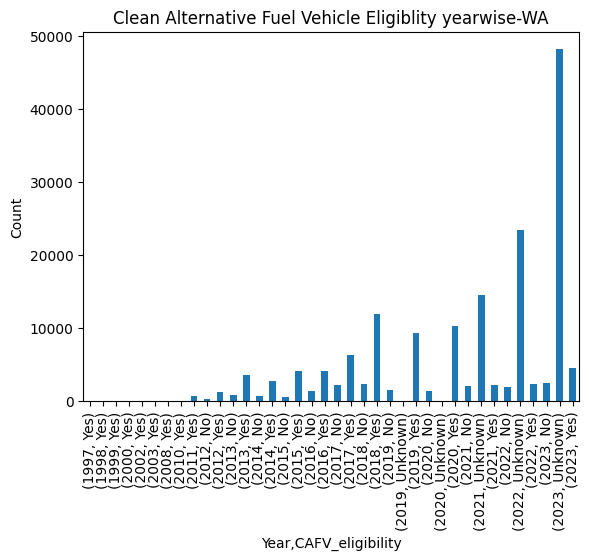

In [262]:
df_wa.groupby(['Year','CAFV_eligibility'])['Make'].count().plot(kind='bar',
    xlabel = 'Year,CAFV_eligibility',ylabel='Count',
    title = 'Clean Alternative Fuel Vehicle Eligiblity yearwise-WA');

The plot clearly shows Clean Alternative Fuel Vehicle Eligiblity norms created/changed in 2019, and these norms are changed and stricter rules imposed from 2021 onwards.

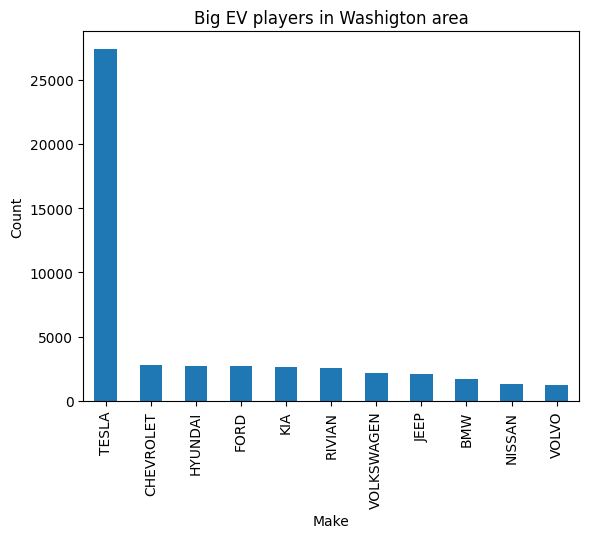

In [263]:
df_wa23 = df_wa[df_wa['Year']==2023].reset_index(drop=True)
df_big = df_wa23.groupby(['Make'])['CAFV_eligibility'].count().reset_index().sort_values(by=['CAFV_eligibility','Make'],ascending=False).reset_index(drop=True)

df_big.loc[:10].set_index('Make').plot(kind='bar',
                                       xlabel='Make',ylabel='Count',
                                       title = 'Big EV players in Washigton area',
                                       legend=False);


#### Tesla is the largest player in Electric vehicle market of Washington

### Getting USA data from IEA global dataset

In [264]:
df_usa = df_raw2[(df_raw2['region']=='USA')&(df_raw2['unit']=='Vehicles')&(df_raw2['parameter']=='EV sales')]
df_usa = df_usa.reset_index(drop=True)
df_usa.sample()

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.0


In [265]:
# Removing unnecessary columns
df_usa.drop(columns=['category','parameter','mode','unit','region'],inplace=True)

In [266]:
df_usa.head()

,powertrain,year,value
0,BEV,2010,1200.0
1,BEV,2011,9800.0
2,PHEV,2011,8000.0
3,PHEV,2012,39000.0
4,BEV,2012,15000.0


In [267]:
# preparing washigton data in desired format to combine dataset
df_wa.head()

,Year,Make,EV_type,CAFV_eligibility,Electric_Range
0,2016,BMW,PHEV,No,14.0
1,2018,TESLA,BEV,Yes,215.0
2,2014,CHEVROLET,PHEV,Yes,38.0
3,2021,CHRYSLER,PHEV,Yes,32.0
4,2018,TESLA,BEV,Yes,215.0


In [268]:
# Saving cleaned dataset
df_wa.to_csv('Wasington_EV_Cleaned.csv')

In [269]:
wa_ev = df_wa.groupby(['Year','EV_type'])['Make'].count().reset_index()
wa_ev.tail()

,Year,EV_type,Make
30,2021,PHEV,3821
31,2022,BEV,23377
32,2022,PHEV,4346
33,2023,BEV,48151
34,2023,PHEV,7073


In [270]:
# Combining two datasets
merged = pd.merge(df_usa,wa_ev,how='left',left_on=['powertrain','year'],right_on=['EV_type','Year'])
merged.head()

,powertrain,year,value,Year,EV_type,Make
0,BEV,2010,1200.0,2010,BEV,19
1,BEV,2011,9800.0,2011,BEV,700
2,PHEV,2011,8000.0,2011,PHEV,76
3,PHEV,2012,39000.0,2012,PHEV,868
4,BEV,2012,15000.0,2012,BEV,766


In [271]:
# Removing repetitive columns
merged = merged.drop(columns=['Year','EV_type'])

In [272]:
# Changing column names
merged.columns=['EV_type','Year','USA_vol','Wa_vol']
merged.head()

,EV_type,Year,USA_vol,Wa_vol
0,BEV,2010,1200.0,19
1,BEV,2011,9800.0,700
2,PHEV,2011,8000.0,76
3,PHEV,2012,39000.0,868
4,BEV,2012,15000.0,766


In [273]:
# Volume of EV vehicles yearwise
yearly = merged.groupby('Year')[['USA_vol','Wa_vol']].sum().reset_index()
yearly

,Year,USA_vol,Wa_vol
0,2010,1200.0,19
1,2011,17800.0,776
2,2012,54000.0,1634
3,2013,97000.0,4450
4,2014,118000.0,3518
5,2015,114000.0,4834
6,2016,160000.0,5516
7,2017,194000.0,8572
8,2018,360000.0,14297
9,2019,325000.0,10888


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [274]:
# saving data in CSV format
merged.to_csv('EVcomp_merged.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question: 

How well is the EV sales in the state of Washington compared to USA EV sales?

In [275]:
# USA EV volume is much higher compare to Washington EV sales
# to visualise, the data needs to be normalised
yearly['USA_norm'] = (yearly.USA_vol/yearly.USA_vol.sum())*100
yearly['Wa_norm'] = (yearly.Wa_vol/yearly.Wa_vol.sum())*100
yearly

,Year,USA_vol,Wa_vol,USA_norm,Wa_norm
0,2010,1200.0,19,0.035768,0.016835
1,2011,17800.0,776,0.530551,0.687578
2,2012,54000.0,1634,1.609538,1.447811
3,2013,97000.0,4450,2.891207,3.942938
4,2014,118000.0,3518,3.517139,3.117136
5,2015,114000.0,4834,3.397914,4.283183
6,2016,160000.0,5516,4.769001,4.887471
7,2017,194000.0,8572,5.782414,7.595251
8,2018,360000.0,14297,10.730253,12.667907
9,2019,325000.0,10888,9.687034,9.647351


In [276]:
yearly1 = yearly.copy()
yearly1.drop(columns=['USA_vol','Wa_vol'],inplace=True)

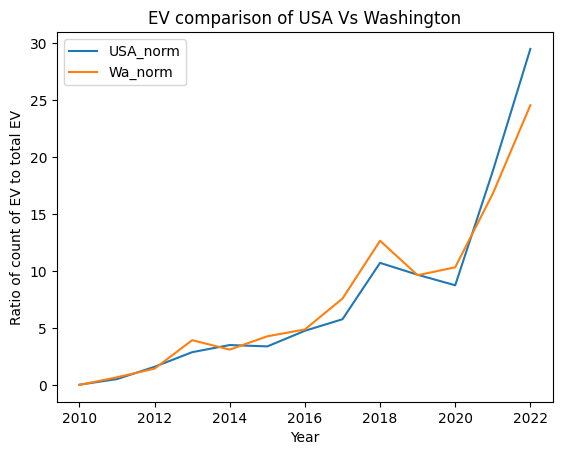

In [277]:
#Visual 1 Making lineplot 
yearly1.set_index('Year').plot(
    xlabel='Year',
    ylabel='Ratio of count of EV to total EV',
    title='EV comparison of USA Vs Washington');

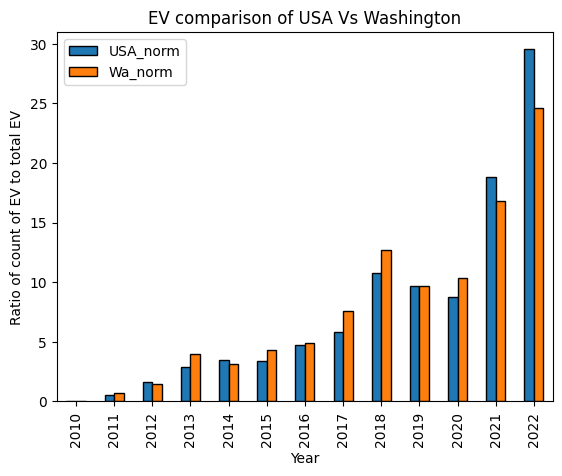

In [278]:
# Making barplot
yearly1.set_index('Year').plot(kind='bar',
    xlabel='Year',
    ylabel='Ratio of count of EV to total EV',
    title='EV comparison of USA Vs Washington',
    edgecolor='black');

*Answer to research question: 

Washington states EV sales almost is in line with USA EV sales, till year 2020 Washington EV volume is higher than USA.
But from year 2021 USA EV volume is higher than Washington.


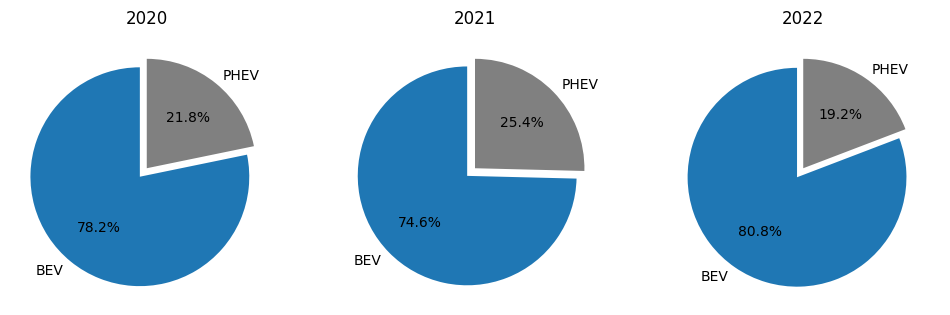

In [279]:
#Visual 2 - creating comparison pie chart for USA 
#total sales of Different EV types with Washington EV types

# function for finding and displaying percent value 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)

# Function for creating piechart
def piechart(val,y):
    df = merged[merged['Year']== y].sort_values(by='EV_type')
    explode = (0.1, 0.0)
    plt.pie(df[val],labels=df['EV_type'],
            autopct=lambda pct: func(pct,df[val]),
            startangle=90,
            explode=explode,
            colors=['tab:blue','grey']);
    plt.title(y)

# Creating piechart by calling function in subplot
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.title('USA Sales of EV-type')
piechart('USA_vol',2020)
plt.subplot(1,3,2)
piechart('USA_vol',2021)
plt.subplot(1,3,3)
piechart('USA_vol',2022)

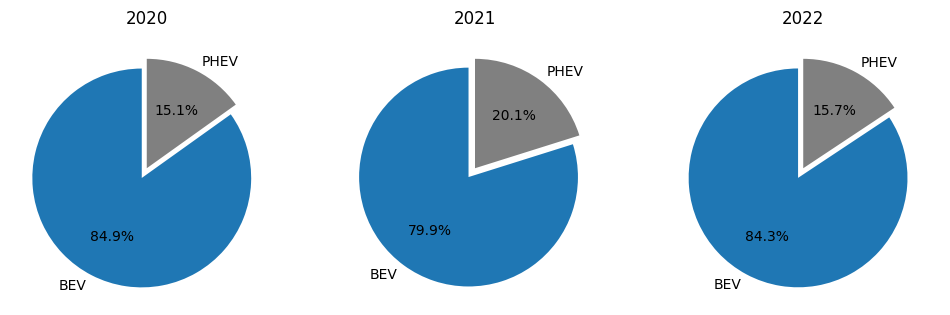

In [280]:
# Creating piechart for Washigton EV type by calling 
# function in subplot
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.title('Washington EV-types')
piechart('Wa_vol',2020)
plt.subplot(1,3,2)
piechart('Wa_vol',2021)
plt.subplot(1,3,3)
piechart('Wa_vol',2022)

*Answers to research question:* 

 - Battery electric vehicle has huge share in all years for both Washigton and USA. 
 - But in 2021 Plugin hybrid vehicle gained market share of almost 5% in both data.
 - BEV market share is higher in WA compare to USA due to high volume of Tesla

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 
Clean Alternative Fuel Vehicle (CAFV) Eligibility column is one of the interesting column i want to further dig in. 

It has three values, eligible,not eligible due to low battery range and unknown. I am curious to know what is that unknown. 

It might lead to many research question like 

what are the criteria for eligibility?

What make of car is meeting this standard and what are not?

Which maker is producing more car with standards met?